# ABC Decomposion of Jupiter, Solar, and Telluric Spectra

In [3]:
import numpy as np
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import pylab
from decimal import *
from astropy.io import fits
from jovispec import abcio
import chopstacks as cs
import sklearn.linear_model as lm
from jovispec import abcweight as aw
import pkg_resources

In [4]:
jupiter_data = pkg_resources.resource_filename("jovispec", "jupiter_data")

#read data
#lambc, specc, headc=abcio.read_qfits("06034","../jupiter_data",ext="q")
#lambw, specw, headw=abcio.read_qfits("06048","../jupiter_data",ext="q")
#lambe, spece, heade=abcio.read_qfits("06050","../jupiter_data",ext="q")

rlambc, rspecc, rheadc=abcio.read_qfits("06033",jupiter_data,ext="q")
rlambw, rspecw, rheadw=abcio.read_qfits("06047",jupiter_data,ext="q")
rlambe, rspece, rheade=abcio.read_qfits("06049",jupiter_data,ext="q")

In [14]:
#select indexes
## water and methane
#ks1,ke1=np.digitize([8345,8444],map(float,rlambe))

#ks1,ke1=np.digitize([8345,8365],map(float,rlambe))
#ks1,ke1=np.digitize(Decimal(8345),Decimal(8365),rlambe)

rlambe_f = np.array([float(d) for d in rlambe])
ks1,ke1=np.digitize([8345,8365],rlambe_f)

## metal and something
#ks2,ke2=np.digitize([8464,8565],map(float,rlambe))

#ks1,ke1=np.digitize([8430,8440],map(float,rlambe))
## Methane-rich band
#ks3,ke3=np.digitize([8587,8689],map(float,rlambe))

38206 39108


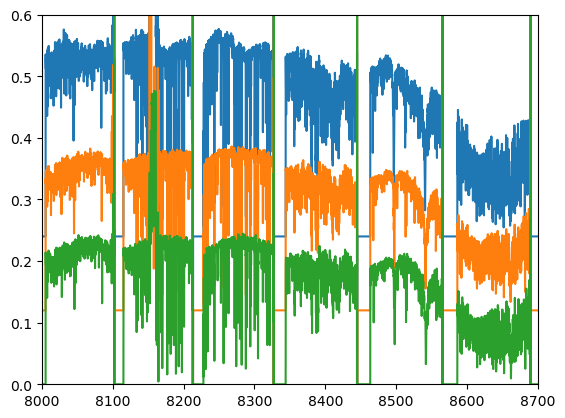

In [16]:
# obs data used in this analysis 
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(rlambe,rspece+0.24)
ax.plot(rlambc,rspecc+0.12)
ax.plot(rlambw,rspecw*0.5)
pylab.xlim(8000,8700)
pylab.ylim(0,0.6)
#ax.plot(lambe[ks:ke],spece[ks:ke])
plt.show()

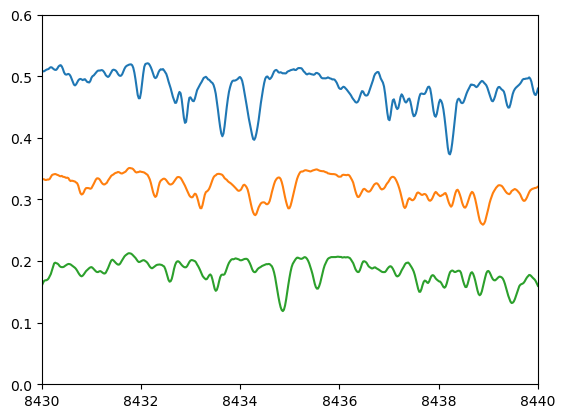

In [17]:
# obs data used in this analysis 
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(rlambe,rspece+0.24)
ax.plot(rlambc,rspecc+0.12)
ax.plot(rlambw,rspecw*0.5)
pylab.xlim(8345,8365)
pylab.xlim(8430,8440)
pylab.ylim(0,0.6)
#ax.plot(lambe[ks:ke],spece[ks:ke])
plt.show()

In [19]:
# resampling and use new coordinates ( c log lambda - log f)
c=299792.
R=300000
wav = np.array([float(d) for d in rlambe[ks1:ke1]])
#wav=map(float,rlambe[ks1:ke1])
wavw=cs.buildwall(wav)
f=np.log(rspece[ks1:ke1]/np.median(rspece[ks1:ke1]))
hx, hxw, hfe=cs.setanalogbin(wav,wavw,f,R,1)
f=np.log(rspecw[ks1:ke1]/np.median(rspecw[ks1:ke1]))
hx, hxw, hfw=cs.setanalogbin(wav,wavw,f,R,1)
f=np.log(rspecc[ks1:ke1]/np.median(rspecc[ks1:ke1]))
hx, hxw, hfc=cs.setanalogbin(wav,wavw,f,R,1)

hx=hx*c

dv=hx[100]-hx[101]

Reset master data (hf) to zero.
Reset master data (hf) to zero.
Reset master data (hf) to zero.


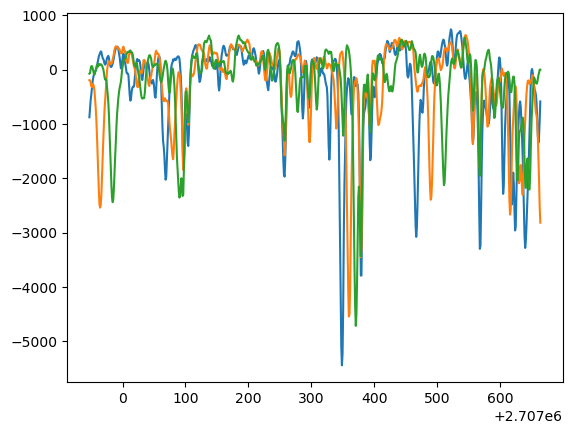

In [20]:
#after resampling
offset=2706000
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(hx,hfe)
ax.plot(hx,hfc)
ax.plot(hx,hfw)
#plt.xlim(offset+2200,offset+2400)
plt.show()

In [8]:
#import scipy
#from scipy import signal
#cora=scipy.signal.correlate(hfe,hfc)

#fig=plt.figure()
#ax=fig.add_subplot(111)
#ax.plot(cora[N-20:N],".",c="blue")
#plt.show()

In [21]:
#compute weight
vr=-11  ### just use vrot ~ 11 km/s
deltav=np.array([[0,vr,2*vr],[0,0,0],[0,-vr,-2*vr]])
K=len(hx)
P=3
Q=3
Wij=aw.generate_abc_design_matrix(deltav,K)
fobs=np.hstack([hfe,hfc,hfw]) 

I used 4 for loops!! Please modify my code anyone!!!
0 / 3 - 0 / 3
0 / 3 - 1 / 3
0 / 3 - 2 / 3
1 / 3 - 0 / 3
1 / 3 - 1 / 3
1 / 3 - 2 / 3
2 / 3 - 0 / 3
2 / 3 - 1 / 3
2 / 3 - 2 / 3


In [24]:
#Solve the linear model
clf = lm.RidgeCV(alphas = [1.e-1,3.e-1,1.e0,3.e0])
#clf = lm.Ridge(alpha = 1.e-20)
clf.fit(Wij,fobs) 
print("Ridge lambda=",clf.alpha_)

cestr=clf.coef_
interr=clf.intercept_

clf = lm.LassoCV(alphas = [1.e-2,3.e-2,1.e-1,3.e-1,1.e0])
#clf = lm.Lasso(alpha = 1.e-2)
clf.fit(Wij,fobs) 
print("LASSO lambda=",clf.alpha_)

cestl=clf.coef_
interl=clf.intercept_

cestqr = np.array_split(cestr,Q)
cestql = np.array_split(cestl,Q)

la=np.exp(hx/c)

Ridge lambda= 0.3
LASSO lambda= 0.1


In [ ]:
#clf = lm.Ridge(alpha = 1.e-20)

In [25]:
#compute predictions
fprer=np.dot(Wij,cestr)+interr
fpr=np.array_split(fprer,P)

fprel=np.dot(Wij,cestl)+interl
fpl=np.array_split(fprel,P)

### Prediction Curve for Ridge & Lasso

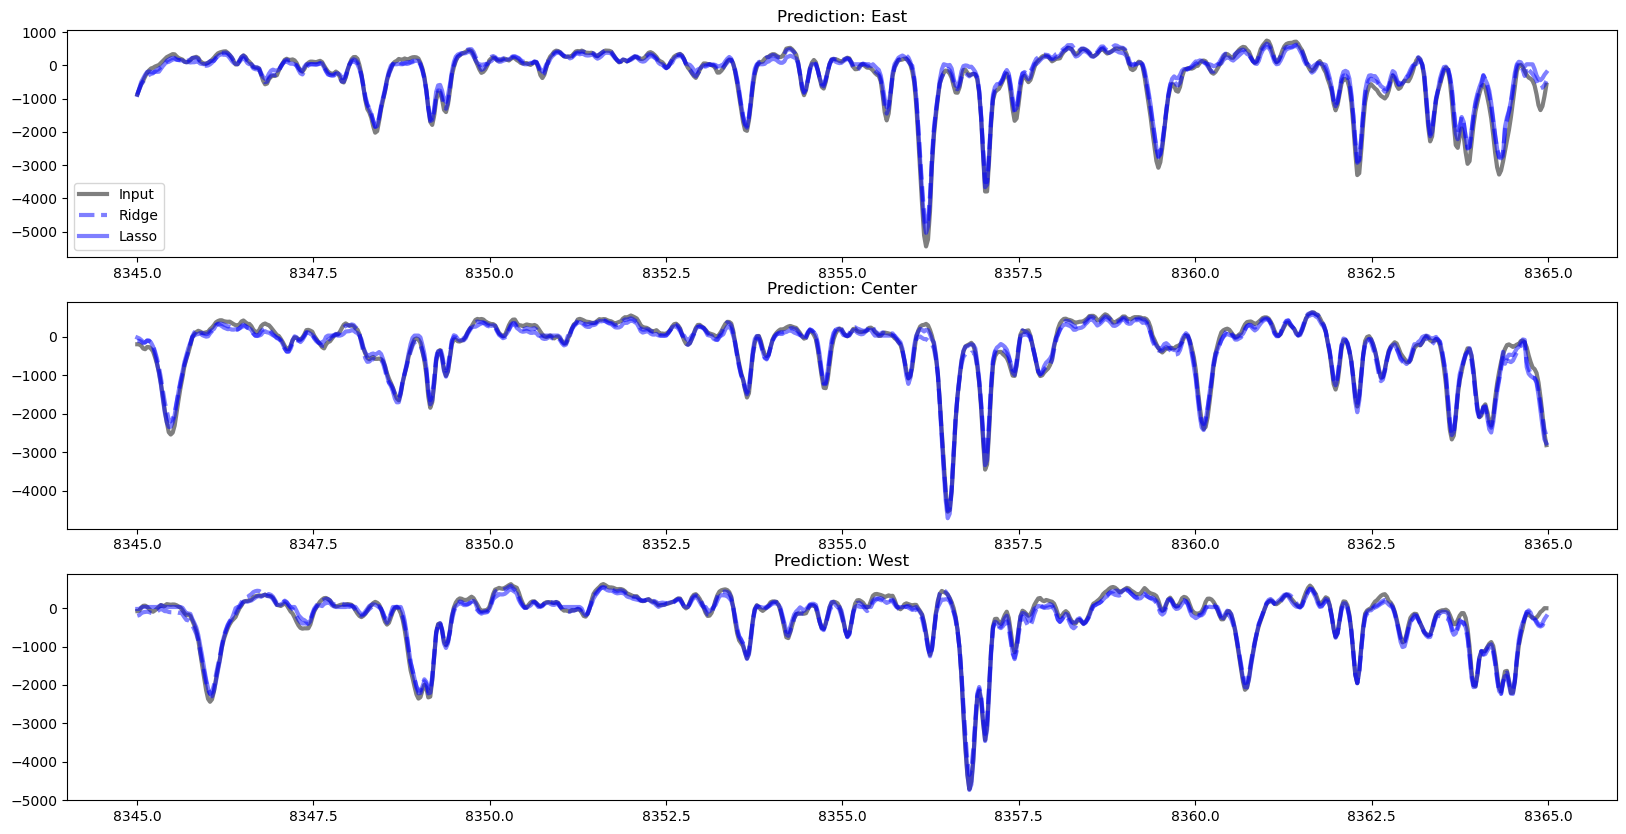

In [26]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(311)
ax.plot(la,hfe,lw=3,color="black",alpha=0.5)
ax.plot(la,fpr[0],lw=3,alpha=0.5,color="blue",ls="dashed")
ax.plot(la,fpl[0],lw=3,alpha=0.5,color="blue")
plt.title("Prediction: East")
plt.legend(["Input","Ridge","Lasso"])
ax=fig.add_subplot(312)
ax.plot(la,hfc,lw=3,color="black",alpha=0.5)
ax.plot(la,fpr[1],lw=3,alpha=0.5,color="blue",ls="dashed")
ax.plot(la,fpl[1],lw=3,alpha=0.5,color="blue")
plt.title("Prediction: Center")
ax=fig.add_subplot(313)
ax.plot(la,hfw,lw=3,color="black",alpha=0.5)
ax.plot(la,fpr[2],lw=3,alpha=0.5,color="blue",ls="dashed")
ax.plot(la,fpl[2],lw=3,alpha=0.5,color="blue")

plt.title("Prediction: West")
plt.show()

In [27]:
#compute the prediction for each component 
renorm=np.hstack([la,la,la])
fprelt=(np.dot(Wij,np.hstack([cestql[0],np.zeros(2*K)]))+interl)/renorm #telluric
fplt=np.array_split(fprelt,P)
efplt=np.array_split(np.exp(fprelt),P)


fprelp=(np.dot(Wij,np.hstack([np.zeros(K),cestql[1],np.zeros(K)]))+interl)/renorm #planet
fplp=np.array_split(fprelp,P)
efplp=np.array_split(np.exp(fprelp),P)

fprels=(np.dot(Wij,np.hstack([np.zeros(2*K),cestql[2]]))+interl)/renorm #stellar
fpls=np.array_split(fprels,P)
efpls=np.array_split(np.exp(fprels),P)


In [24]:
len(fprelt), len(la)*3

(2151, 2151)

### Predictions for each component and position (LASSO)

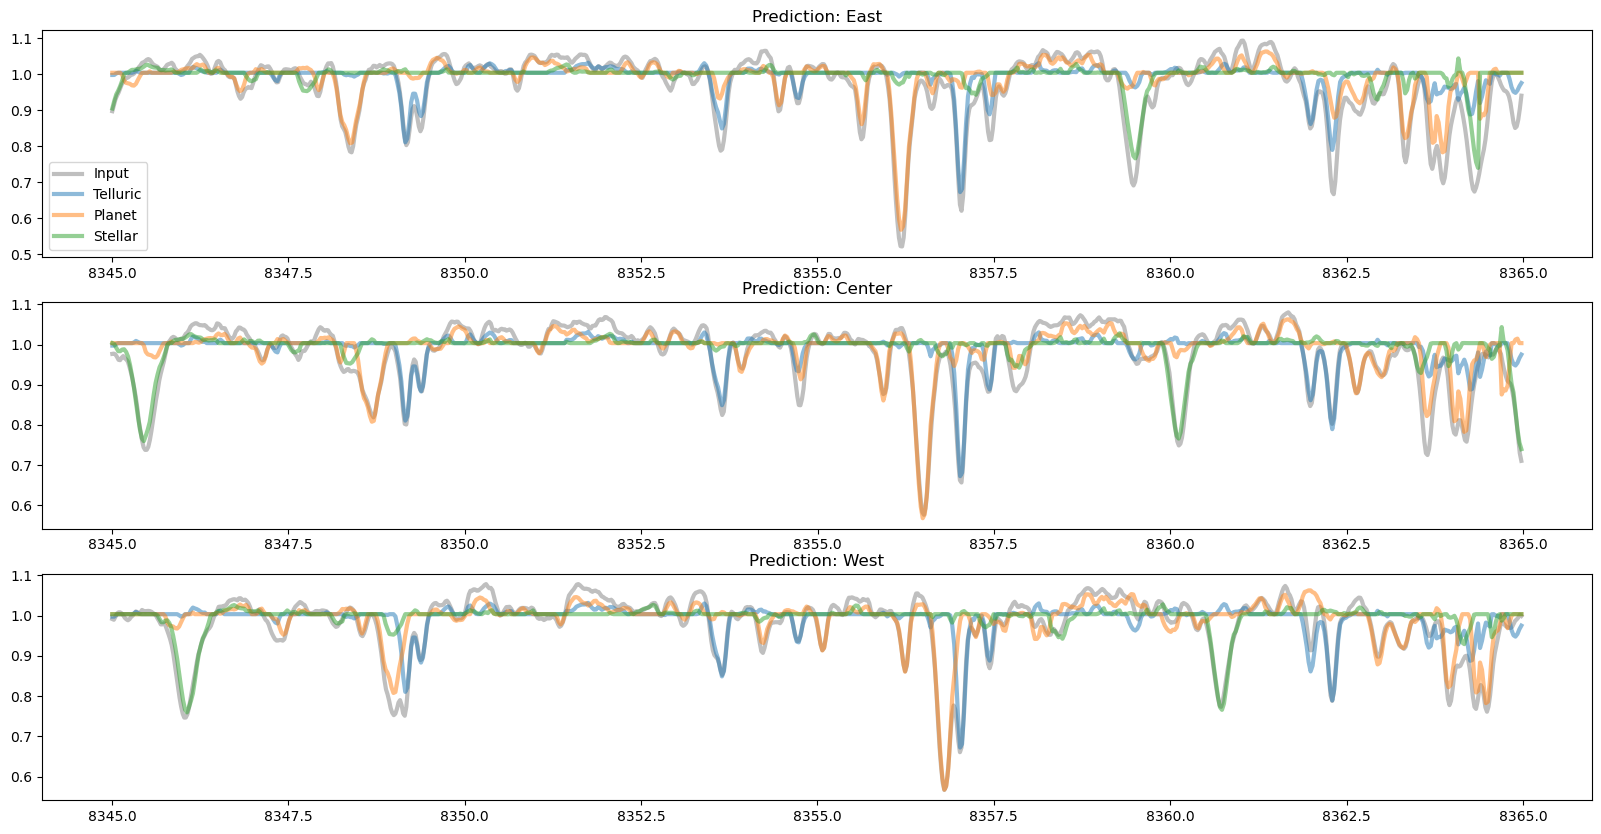

In [28]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(311)
#ax.plot(la,hfe,lw=3,color="black",alpha=0.5)
ax.plot(rlambe[ks1:ke1],rspece[ks1:ke1]/np.median(rspece[ks1:ke1]),lw=3,alpha=0.5,color="gray")
ax.plot(la,efplt[0],lw=3,alpha=0.5)
ax.plot(la,efplp[0],lw=3,alpha=0.5)
ax.plot(la,efpls[0],lw=3,alpha=0.5)
plt.title("Prediction: East")
plt.legend(["Input","Telluric","Planet","Stellar"])
ax=fig.add_subplot(312)
ax.plot(rlambc[ks1:ke1],rspecc[ks1:ke1]/np.median(rspecc[ks1:ke1]),lw=3,alpha=0.5,color="gray")
ax.plot(la,efplt[1],lw=3,alpha=0.5)
ax.plot(la,efplp[1],lw=3,alpha=0.5)
ax.plot(la,efpls[1],lw=3,alpha=0.5)
plt.title("Prediction: Center")
ax=fig.add_subplot(313)
ax.plot(rlambw[ks1:ke1],rspecw[ks1:ke1]/np.median(rspecw[ks1:ke1]),lw=3,alpha=0.5,color="gray")
#ax.plot(la,hfw,lw=3,color="black",alpha=0.5)
ax.plot(la,efplt[2],lw=3,alpha=0.5)
ax.plot(la,efplp[2],lw=3,alpha=0.5)
ax.plot(la,efpls[2],lw=3,alpha=0.5)
plt.title("Prediction: West")
plt.show()

### Each component

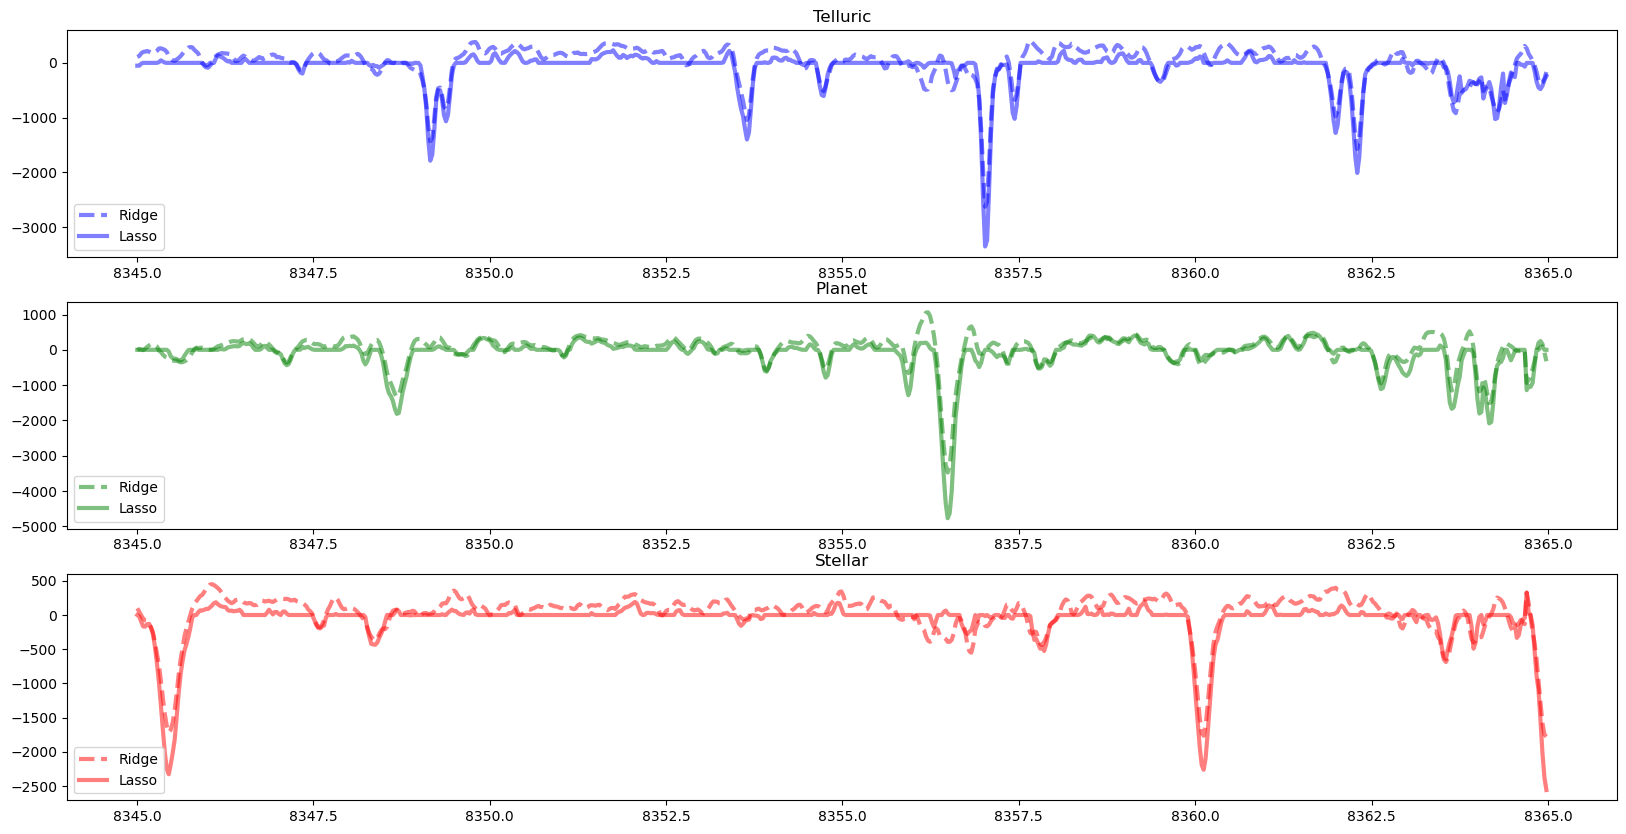

In [29]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(311)
ax.plot(la,(cestqr[0]),lw=3,alpha=0.5,color="blue",ls="dashed")
ax.plot(la,(cestql[0]),lw=3,alpha=0.5,color="blue")
plt.legend(["Ridge","Lasso"])
plt.title("Telluric")
ax=fig.add_subplot(312)
ax.plot(la,(cestqr[1]),lw=3,alpha=0.5,color="green",ls="dashed")
ax.plot(la,(cestql[1]),lw=3,alpha=0.5,color="green")
plt.legend(["Ridge","Lasso"])
plt.title("Planet")
ax=fig.add_subplot(313)
ax.plot(la,(cestqr[2]),lw=3,alpha=0.5,color="red",ls="dashed")
ax.plot(la,(cestql[2]),lw=3,alpha=0.5,color="red")
plt.legend(["Ridge","Lasso"])
plt.title("Stellar")
plt.show()